In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve


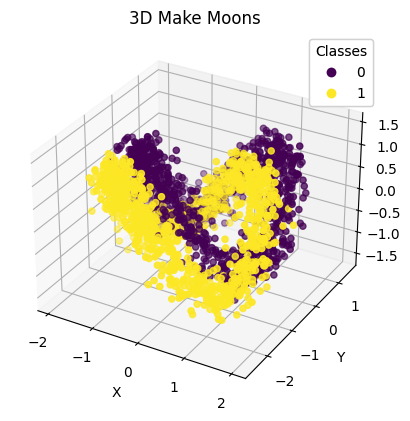

In [ ]:
# Generating 3D make-moons data

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_moons_3d(n_samples=500, noise=0.1):
    # Generate the original 2D make_moons data
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)  # Adding a sinusoidal variation in the third dimension

    # Concatenating the positive and negative moons with an offset and noise
    X = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

    # Adding Gaussian noise
    X += np.random.normal(scale=noise, size=X.shape)

    return X, y

# Generate the data (1000 datapoints)
X, labels = make_moons_3d(n_samples=1000, noise=0.2)

# # Plotting
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')
# legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
# ax.add_artist(legend1)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.title('3D Make Moons')
# plt.show()

In [ ]:
import numpy as np

# 假设 X 和 labels 已经按照你的代码生成
def print_class_statistics(X, labels):
    # 分离正负类数据
    positive_class = X[labels == 0]
    negative_class = X[labels == 1]

    # 打印正类信息
    print("Positive class:")
    print(f"Count: {positive_class.shape[0]}")
    print(f"Mean: {np.mean(positive_class, axis=0)}")
    print(f"Standard Deviation: {np.std(positive_class, axis=0)}")

    # 打印负类信息
    print("\nNegative class:")
    print(f"Count: {negative_class.shape[0]}")
    print(f"Mean: {np.mean(negative_class, axis=0)}")
    print(f"Standard Deviation: {np.std(negative_class, axis=0)}")

# 假设这里有具体的 X 和 labels
X, labels = make_moons_3d(n_samples=1000, noise=0.2)  # 重新生成数据或者使用之前生成的数据
print_class_statistics(X, labels)


Positive class:
Count: 1000
Mean: [ 0.00771333  0.00103692 -0.01089041]
Standard Deviation: [1.08476788 0.74020916 0.74236275]

Negative class:
Count: 1000
Mean: [ 0.00422131 -0.99423378 -0.00642876]
Standard Deviation: [1.08153784 0.73402093 0.72859756]


In [ ]:
import numpy as np

def make_moons_3d_test(n_samples=250, noise=0.1):
    # Generate the original 2D make_moons data
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)  # Adding a sinusoidal variation in the third dimension

    # Concatenating the positive and negative moons with an offset and noise
    X_test = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    labels_test = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

    # Adding Gaussian noise
    X_test += np.random.normal(scale=noise, size=X_test.shape)

    return X_test, labels_test

# Generate the data with 250 samples for each class and noise level of 0.2
X_test, labels_test = make_moons_3d_test(n_samples=250, noise=0.2)


In [ ]:
#创建对数几率回归分类器
model = LogisticRegression()
#训练模型
model.fit(X, labels)
#测试模型
predictions = model.predict(X_test)
#打印准确率信息
accuracy = accuracy_score(labels_test, predictions)

In [ ]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.672


Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68       250
         1.0       0.68      0.66      0.67       250

    accuracy                           0.67       500
   macro avg       0.67      0.67      0.67       500
weighted avg       0.67      0.67      0.67       500

AUC: 0.672


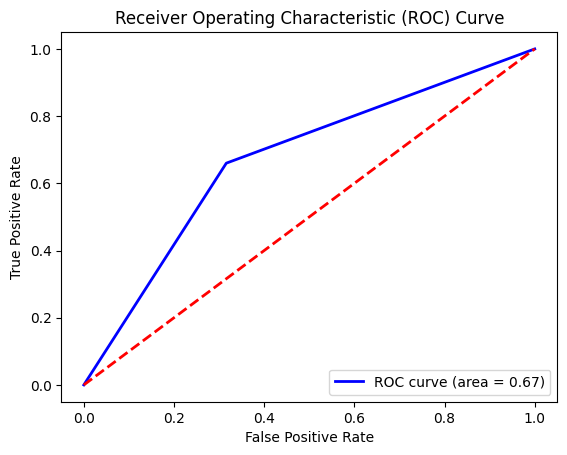

In [ ]:
#report函数可以得到召回率，精确率，混淆矩阵等信息
report = classification_report(labels_test, predictions)
print("Classification Report:")
print(report)
#绘制ROC曲线，获取AUC值
auc = roc_auc_score(labels_test, predictions)
print(f"AUC: {auc}")
#绘制ROC曲线
fpr, tpr, thresholds = roc_curve(labels_test, predictions)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.672
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68       250
         1.0       0.68      0.66      0.67       250

    accuracy                           0.67       500
   macro avg       0.67      0.67      0.67       500
weighted avg       0.67      0.67      0.67       500

AUC: 0.672


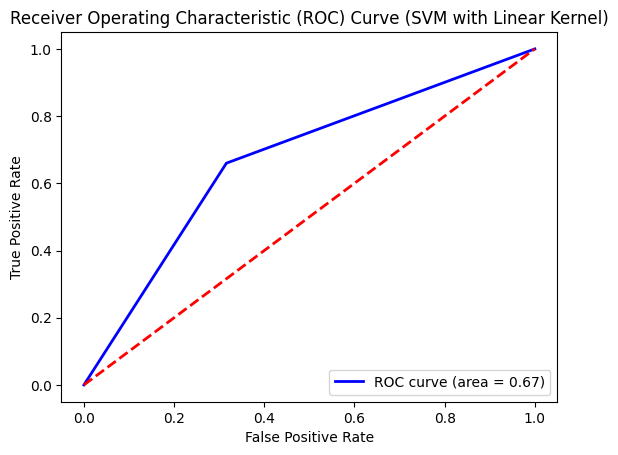

In [ ]:
# 创建线性内核的SVM支持向量机
svm_model = SVC(kernel='linear')
#训练模型
svm_model.fit(X, labels)
#测试模型
svm_predictions = svm_model.predict(X_test)
#打印模型的准确率
svm_accuracy = accuracy_score(labels_test, svm_predictions)
print(f"Accuracy: {svm_accuracy}")
#report函数可以得到召回率，精确率，混淆矩阵等信息
svm_report = classification_report(labels_test, svm_predictions)
print("Classification Report:")
print(svm_report)
#绘制ROC曲线，计算AUC值
svm_auc = roc_auc_score(labels_test, svm_predictions)
print(f"AUC: {svm_auc}")
#绘制ROC曲线
fpr, tpr, thresholds = roc_curve(labels_test, svm_predictions)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % svm_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM with Linear Kernel)')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       250
         1.0       0.96      0.78      0.86       250

    accuracy                           0.87       500
   macro avg       0.88      0.87      0.87       500
weighted avg       0.88      0.87      0.87       500

AUC: 0.87


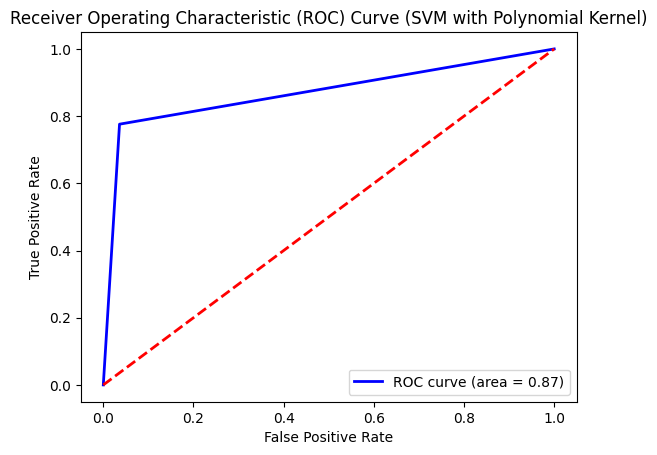

In [ ]:
#创建多项式内核的支持向量机
svm_poly_model = SVC(kernel='poly')
#训练模型
svm_poly_model.fit(X, labels)
#测试模型
svm_poly_predictions = svm_poly_model.predict(X_test)
#计算准确率
svm_poly_accuracy = accuracy_score(labels_test, svm_poly_predictions)
print(f"Accuracy: {svm_poly_accuracy}")
#report函数可以得到召回率，精确率，混淆矩阵等信息
svm_poly_report = classification_report(labels_test, svm_poly_predictions)
print("Classification Report:")
print(svm_poly_report)
#绘制ROC曲线，计算AUC值
svm_poly_auc = roc_auc_score(labels_test, svm_poly_predictions)
print(f"AUC: {svm_poly_auc}")
fpr, tpr, thresholds = roc_curve(labels_test, svm_poly_predictions)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % svm_poly_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM with Polynomial Kernel)')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.982
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       250
         1.0       0.98      0.98      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

AUC: 0.982


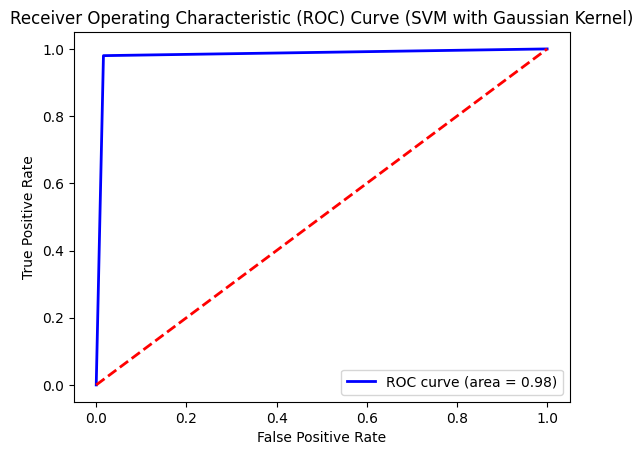

In [ ]:
#创建高斯内核的支持向量机
svm_rbf_model = SVC(kernel='rbf')
#训练模型
svm_rbf_model.fit(X, labels)
#测试模型
svm_rbf_predictions = svm_rbf_model.predict(X_test)
#计算准确率
svm_rbf_accuracy = accuracy_score(labels_test, svm_rbf_predictions)
print(f"Accuracy: {svm_rbf_accuracy}")
#report函数可以得到召回率，精确率，混淆矩阵等信息
svm_rbf_report = classification_report(labels_test, svm_rbf_predictions)
print("Classification Report:")
print(svm_rbf_report)
#绘制ROC曲线，计算AUC值
svm_rbf_auc = roc_auc_score(labels_test, svm_rbf_predictions)
print(f"AUC: {svm_rbf_auc}")
fpr, tpr, thresholds = roc_curve(labels_test, svm_rbf_predictions)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % svm_rbf_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM with Gaussian Kernel)')
plt.legend(loc="lower right")
plt.show()


XGBoost分类器

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       250
         1.0       0.97      0.99      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

AUC: 0.9799999999999999


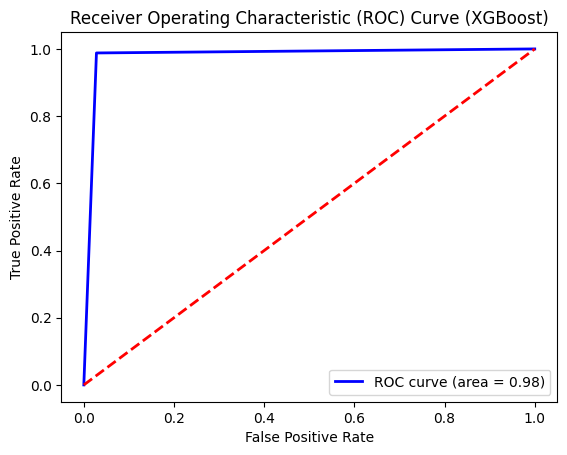

In [ ]:
#创建XGBoost分类器
xgb_model = xgb.XGBClassifier()
#训练模型
xgb_model.fit(X, labels)
#测试模型
xgb_predictions = xgb_model.predict(X_test)
#计算准确率
xgb_accuracy = accuracy_score(labels_test, xgb_predictions)
print(f"Accuracy: {xgb_accuracy}")
#report函数可以得到召回率，精确率，混淆矩阵等信息
xgb_report = classification_report(labels_test, xgb_predictions)
print("Classification Report:")
print(xgb_report)
#绘制ROC曲线，计算AUC值
xgb_auc = roc_auc_score(labels_test, xgb_predictions)
print(f"AUC: {xgb_auc}")
fpr, tpr, thresholds = roc_curve(labels_test, xgb_predictions)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost)')
plt.legend(loc="lower right")
plt.show()